In [47]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
import category_encoders as ce
# Alternative : from sklearn.preprocessing import CategoricalEncoder as ce
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

import graphviz

import warnings
warnings.filterwarnings('ignore')

In [116]:
data = 'mxmh_survey_results.csv'
df = pd.read_csv(data)
df.shape

(736, 33)

In [117]:
df.drop(['Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]', 'Frequency [EDM]', 'Frequency [Classical]', 'Frequency [Country]', 'Frequency [Folk]', 'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]', 'Frequency [Latin]', 'Frequency [K pop]', 'Frequency [Lofi]', 'Frequency [Metal]', 'Frequency [Pop]'], axis=1, inplace=True)

In [118]:
df.drop(['Timestamp', 'Permissions', 'Foreign languages', 'Instrumentalist', 'Composer', 'Exploratory'], axis=1, inplace=True)

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        735 non-null    float64
 1   Primary streaming service  735 non-null    object 
 2   Hours per day              736 non-null    float64
 3   While working              733 non-null    object 
 4   Fav genre                  736 non-null    object 
 5   Anxiety                    736 non-null    float64
 6   Depression                 736 non-null    float64
 7   Insomnia                   736 non-null    float64
 8   OCD                        736 non-null    float64
 9   Music effects              728 non-null    object 
dtypes: float64(6), object(4)
memory usage: 57.6+ KB


In [120]:
df.head()

,Age,Primary streaming service,Hours per day,While working,Fav genre,Anxiety,Depression,Insomnia,OCD,Music effects
0,18.0,Spotify,3.0,Yes,Latin,3.0,0.0,1.0,0.0,NaN
1,63.0,Pandora,1.5,Yes,Rock,7.0,2.0,2.0,1.0,NaN
2,18.0,Spotify,4.0,No,Video game music,7.0,7.0,10.0,2.0,No effect
3,61.0,YouTube Music,2.5,Yes,Jazz,9.0,7.0,3.0,3.0,Improve
4,18.0,Spotify,4.0,Yes,R&B,7.0,2.0,5.0,9.0,Improve


In [121]:
col_names = ['Age', 'Hours per day', 'Fav genre', 'Anxiety', 'Depression', 'Insomnia', 'OCD']

for col in col_names:
    print(df[col].value_counts())  

18.0    85
19.0    61
17.0    59
21.0    52
16.0    44
        ..
39.0     1
73.0     1
72.0     1
69.0     1
89.0     1
Name: Age, Length: 61, dtype: int64
2.00     173
3.00     120
1.00     117
4.00      83
5.00      54
6.00      47
8.00      29
10.00     20
0.50      20
1.50      17
7.00      15
12.00      9
0.00       6
2.50       6
0.25       3
24.00      3
9.00       3
15.00      2
0.70       1
4.50       1
20.00      1
16.00      1
14.00      1
13.00      1
0.10       1
11.00      1
18.00      1
Name: Hours per day, dtype: int64
Rock                188
Pop                 114
Metal                88
Classical            53
Video game music     44
EDM                  37
R&B                  35
Hip hop              35
Folk                 30
K pop                26
Country              25
Rap                  22
Jazz                 20
Lofi                 10
Gospel                6
Latin                 3
Name: Fav genre, dtype: int64
7.0     122
8.0     115
6.0      83
3.0     

In [122]:
df['Age'].value_counts()

18.0    85
19.0    61
17.0    59
21.0    52
16.0    44
        ..
39.0     1
73.0     1
72.0     1
69.0     1
89.0     1
Name: Age, Length: 61, dtype: int64

In [123]:
df.isnull().sum()

Age                          1
Primary streaming service    1
Hours per day                0
While working                3
Fav genre                    0
Anxiety                      0
Depression                   0
Insomnia                     0
OCD                          0
Music effects                8
dtype: int64

In [124]:
X = df.drop(['Age'], axis=1)

y = df['Age']

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [126]:
X_train.shape, X_test.shape

((493, 9), (243, 9))

In [127]:
X_train.dtypes

Primary streaming service     object
Hours per day                float64
While working                 object
Fav genre                     object
Anxiety                      float64
Depression                   float64
Insomnia                     float64
OCD                          float64
Music effects                 object
dtype: object

In [128]:
X_test.dtypes

Primary streaming service     object
Hours per day                float64
While working                 object
Fav genre                     object
Anxiety                      float64
Depression                   float64
Insomnia                     float64
OCD                          float64
Music effects                 object
dtype: object

In [129]:
X_train.head()

,Primary streaming service,Hours per day,While working,Fav genre,Anxiety,Depression,Insomnia,OCD,Music effects
7,Spotify,1.0,Yes,K pop,5.0,3.0,5.0,3.0,Improve
89,Spotify,3.0,Yes,Hip hop,2.0,0.0,7.0,0.0,No effect
558,Spotify,2.0,Yes,R&B,3.0,3.0,1.0,0.0,Improve
363,Spotify,4.0,Yes,Hip hop,3.0,2.0,1.0,6.0,Improve
432,Spotify,2.0,Yes,Classical,7.0,5.0,3.0,1.0,Improve


In [130]:
encoder = ce.OrdinalEncoder(cols=['Primary streaming service', 'While working', 'Fav genre', 'BPM', 'Music effects'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [131]:
X_train.head()

,Primary streaming service,Hours per day,While working,Fav genre,Anxiety,Depression,Insomnia,OCD,Music effects
7,1,1.0,1,1,5.0,3.0,5.0,3.0,1
89,1,3.0,1,2,2.0,0.0,7.0,0.0,2
558,1,2.0,1,3,3.0,3.0,1.0,0.0,1
363,1,4.0,1,2,3.0,2.0,1.0,6.0,1
432,1,2.0,1,4,7.0,5.0,3.0,1.0,1


In [132]:
X_test.head()

,Primary streaming service,Hours per day,While working,Fav genre,Anxiety,Depression,Insomnia,OCD,Music effects
669,1,1.0,1,1,8.0,7.0,1.0,1.0,2
33,1,4.0,2,7,5.0,6.0,6.0,1.0,1
549,1,2.0,2,7,8.0,3.0,1.0,3.0,1
199,3,2.0,1,7,10.0,8.0,6.0,2.0,1
264,1,2.0,1,13,7.0,2.0,0.0,7.0,2


In [137]:
X_train = np.nan_to_num(X_test)
y_train = np.nan_to_num(y_test)

In [138]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [139]:
y_pred_gini = clf_gini.predict(X_test)

In [140]:
print('Accuracy score : Testing:- {0:0.4f}'.format(accuracy_score(y_test, y_pred_gini)))

y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

print('Accuracy score : Training:- {0:0.4f}'.format(accuracy_score(y_train, y_pred_train_gini)))

Accuracy score : Testing:- 0.1811
Accuracy score : Training:- 0.1811


In [141]:
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.1811
Test set score: 0.1811


[Text(0.5769230769230769, 0.875, 'X[3] <= 15.5\ngini = 0.946\nsamples = 243\nvalue = [1, 1, 2, 7, 9, 15, 17, 32, 22, 17, 13, 13, 10\n6, 7, 6, 4, 2, 2, 5, 5, 7, 4, 4, 2, 3, 2\n2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1]'),
 Text(0.3076923076923077, 0.625, 'X[1] <= 2.25\ngini = 0.948\nsamples = 237\nvalue = [1, 1, 2, 7, 8, 15, 16, 28, 22, 17, 13, 13, 10\n6, 7, 6, 4, 2, 2, 5, 5, 7, 4, 4, 2, 3, 2\n2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1]'),
 Text(0.15384615384615385, 0.375, 'X[5] <= 5.5\ngini = 0.954\nsamples = 107\nvalue = [1, 1, 0, 3, 1, 3, 5, 10, 6, 5, 8, 7, 9, 2\n6, 1, 1, 1, 1, 2, 4, 5, 2, 3, 2, 2, 1, 0\n0, 2, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1\n1, 1, 1, 0, 0, 1, 0]'),
 Text(0.07692307692307693, 0.125, 'gini = 0.949\nsamples = 66\nvalue = [1, 0, 0, 3, 0, 3, 2, 9, 5, 3, 2, 3, 3, 2\n5, 1, 0, 0, 1, 1, 1, 3, 1, 1, 2, 1, 1, 0\n0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1\n1, 1, 1, 0, 0, 1, 0]'),
 Text(0.23076923076923078, 0.125, 'gini = 0.922\nsamp

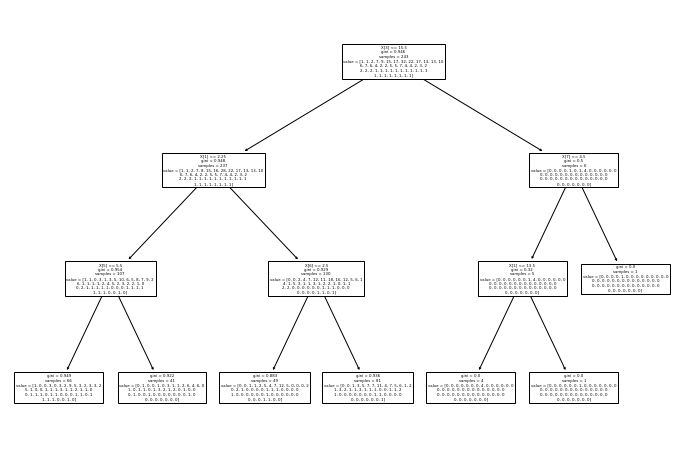

In [142]:
plt.figure(figsize=(12,8))

tree.plot_tree(clf_gini.fit(X_train, y_train))